In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dir_out = 'outputs/'
dir_fig = 'plots'

In [4]:
file_cov = '../data/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
display(df_cov)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [5]:
file_psam = '../data/REACH_LR_platform.psam'
df_p = pd.read_table(file_psam, sep='\t', header=None, names = ['famid', 'sample_id', 'dad', 'mom', 'sex', 'phen'])
display(df_p)

print('complete trios:')
df_trios = df_p.loc[df_p.dad.isin(df_p.sample_id) & df_p.mom.isin(df_p.sample_id)]
display(df_trios)
print(df_trios.sex.value_counts())
print(df_trios.phen.value_counts())

# make mom and dad dictionary
sample_dad_dict = {}
sample_mom_dict = {}
for sample, dad, mom in zip(df_trios.sample_id, df_trios.dad, df_trios.mom):
    #print(sample, dad, mom)
    sample_dad_dict[sample] = dad
    sample_mom_dict[sample] = mom

parents_set_lr = set(df_trios.dad.tolist()) | set(df_trios.mom.tolist())

parents_set_pb = set([x for x in parents_set_lr if plat_dict[x]=='PB'])
parents_set_ont = set([x for x in parents_set_lr if plat_dict[x]=='ONT'])

parent_kids_dict = {}
mom_kids_dict = {}
dad_kids_dict = {}
for parent in parents_set_lr:
    parent_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent) | (df_trios.mom == parent)].sample_id.tolist()
    if parent in df_trios.dad.tolist():
        dad_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent)].sample_id.tolist()
    if parent in df_trios.mom.tolist():
        mom_kids_dict[parent] = df_trios.loc[(df_trios.mom == parent)].sample_id.tolist()
print(f'len(parent_kids_dict): {len(parent_kids_dict)}')
#print(parent_kids_dict)
print(f'len(mom_kids_dict): {len(mom_kids_dict)}')
#print(mom_kids_dict)
print(f'len(dad_kids_dict): {len(dad_kids_dict)}')
#print(dad_kids_dict)

mate_dict = {}
for dad, mom in zip(df_trios.dad, df_trios.mom):
    mate_dict[dad] = mom
    mate_dict[mom] = dad
print(f'len(mate_dict): {len(mate_dict)}')

,famid,sample_id,dad,mom,sex,phen
0,2323,2323-2-1,0,0,2,2
1,2602,2602-2-1,0,0,2,2
2,3392,3392-2-3,0,0,2,2
3,3538,3538-2-1,0,0,2,2
4,3939,3939-3-1,0,0,2,2
...,...,...,...,...,...,...
275,F0270,REACH000681,REACH000683,REACH000682,1,2
276,F0270,REACH000682,0,0,2,2
277,F0270,REACH000683,0,0,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


complete trios:


,famid,sample_id,dad,mom,sex,phen
10,F0026,REACH000026,REACH000270,REACH000269,1,2
11,F0058,REACH000058,REACH000440,REACH000439,1,2
12,F0065,REACH000065,REACH000067,REACH000066,1,2
15,F0078,REACH000086,REACH000088,REACH000087,1,2
18,F0078,REACH000089,REACH000088,REACH000087,2,2
...,...,...,...,...,...,...
271,F0266,REACH000660,REACH000662,REACH000661,2,2
274,F0266,REACH000663,REACH000662,REACH000661,1,1
275,F0270,REACH000681,REACH000683,REACH000682,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


sex
1    74
2    43
Name: count, dtype: int64
phen
2    92
1    25
Name: count, dtype: int64
len(parent_kids_dict): 126
len(mom_kids_dict): 63
len(dad_kids_dict): 63
len(mate_dict): 126


In [6]:
meta_file = '../data/REACH_sample_info.tsv'
df_meta = pd.read_table(meta_file, sep='\t', header=0)

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_meta['Sample_ID'] = df_meta.apply(lambda row: rename_samples_dict[row['Sample_ID']] 
                                     if row['Sample_ID'] in rename_samples_dict else row['Sample_ID'], axis=1)
display(df_meta)

aff_dict = {}
for sample, aff in zip(df_meta['Sample_ID'].tolist(), df_meta['Affected'].tolist()):
    aff_dict[sample] = aff 

,Sample_ID,Subject_ID,Family_ID,DOB,Family_Type,Affected,Diagnosis_LAB,Mother_ID,Father_ID,Rel_Proband,...,Date sent for DNA extraction,Location of DNA extraction,DNA Box,Concentration (ng/uL),260/280,Date sent for Sequencing,WGS Provider,(Sample Well) Plate Name.Sample.ID,Affected_orig,Affected_ASD
0,REACH000001,F0001-01,F0001,3/26/2007,trio,Yes,Autism,F0001-02,F0001-03,Proband,...,Unknown,Gleeson,1,60.0,1.80,9/9/2013,Illumina,LP6005688-DNA_E11,Yes,Yes
1,REACH000107,F0001-02,F0001,8/9/1972,trio,Yes,Autism,Unknown,Unknown,Mom,...,Unknown,Gleeson,2,60.0,NaN,9/9/2013,Illumina,LP6005688-DNA_F11,Yes,Yes
2,REACH000226,F0001-03,F0001,9/27/1969,trio,Yes,"Autism, PTSD, ADHD",Unknown,Unknown,Dad,...,Unknown,Gleeson,3,60.0,NaN,9/9/2013,Illumina,LP6005688-DNA_G11,Yes,Yes
3,REACH000002,F0002-01,F0002,11/19/2007,incomplete,Yes,Autism,Unknown,Unknown,Proband,...,Unknown,Gleeson,1,Incomplete,Incomplete,Incomplete family,Incomplete family,Incomplete family,Yes,Yes
4,REACH000003,F0003-01,F0003,8/9/2000,incomplete,Yes,Autism,Unknown,Unknown,Proband,...,Unknown,Gleeson,1,Incomplete,Incomplete,Incomplete family,Incomplete family,Incomplete family,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,REACH000889,F0320-02,F0320,1/15/1981,multiple,No,"Crohn's Disease, Lupus (SLE)",F8888-88,F8888-88,Mom,...,2/28/2017,Sebat,11,36.2,1.79,pending,pending,pending,No,No
889,REACH000890,F0320-03,F0320,7/9/1980,multiple,No,NaN,F8888-88,F8888-88,Dad,...,2/28/2017,Sebat,11,41.9,1.84,pending,pending,pending,No,No
890,REACH000891,F0320-04,F0320,2/26/2010,multiple,No,NaN,F0320-02,F0320-03,Sibling,...,2/28/2017,Sebat,11,119.7,1.84,pending,pending,pending,No,No
891,REACH000892,F0320-05,F0320,10/14/2011,multiple,No,NaN,F0320-02,F0320-03,Sibling,...,2/28/2017,Sebat,12,134.1,1.85,pending,pending,pending,No,No


In [7]:
file_pca = '../data/master_phen_4.SBayesR.20210915.csv'

df_pca = pd.read_table(file_pca, sep=',', header=0)
cols = ['fid', 'iid', 'phen','sex','cohort','duo','family','is_eur','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 
        'PC1_PAT','PC2_PAT','PC3_PAT','PC4_PAT','PC5_PAT','PC6_PAT','PC7_PAT','PC8_PAT','PC9_PAT','PC10_PAT', 
        'PC1_MAT','PC2_MAT','PC3_MAT','PC4_MAT','PC5_MAT','PC6_MAT','PC7_MAT','PC8_MAT','PC9_MAT','PC10_MAT']
df_pca = df_pca[cols]

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_pca['iid'] = df_pca.apply(lambda row: rename_samples_dict[row['iid']] if row['iid'] in rename_samples_dict else row['iid'], axis=1)
#display(df_pca)

# first filter for the kids, then add parents to them
df_pca_flt = df_pca.loc[df_pca.iid.isin(df_trios.sample_id)].copy()
df_pca_flt['rel'] = 'C'
print('df_pca_flt:')
display(df_pca_flt)

df_parents = pd.DataFrame()
for index, row in df_pca_flt.iterrows():
    sample = row['iid']
    fid = row['fid']
    phen = row['phen']
    is_eur = row['is_eur']
    pc_mat = [row[f'PC{x}_MAT'] for x in range(1,11)]
    pc_pat = [row[f'PC{x}_PAT'] for x in range(1,11)]
    dad = sample_dad_dict[sample]
    mom = sample_mom_dict[sample]
    
    dict_mat = {'fid': [fid], 'iid': [mom], 'phen': ['.'], 'sex': ['Female'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_mat.update({f'PC{x}': [pc_mat[x-1]] for x in range(1,11)})
    df_mat = pd.DataFrame(dict_mat)

    dict_pat = {'fid': [fid], 'iid': [dad], 'phen': ['.'], 'sex': ['Male'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_pat.update({f'PC{x}': [pc_pat[x-1]] for x in range(1,11)})
    df_pat = pd.DataFrame(dict_pat)
    
    if df_parents.shape[0] == 0 or mom not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_mat])
    if df_parents.shape[0] == 0 or dad not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_pat])

df_parents['rel'] = 'P'
print('df_parents:')
display(df_parents)

df_pca_flt = pd.concat([df_pca_flt, df_parents])
print('df_pca_flt:')
display(df_pca_flt)

df_pca_flt = pd.merge(df_pca_flt, df_meta[['Sample_ID', 'Affected', 'Affected_ASD']], how='inner', left_on='iid', right_on='Sample_ID')
df_pca_flt = pd.merge(df_pca_flt, df_cov[['SAMPLE', 'MEAN_COVERAGE']], how='inner', left_on='iid', right_on='SAMPLE')

df_pca_flt['Phenotype'] = df_pca_flt.apply(lambda row: 1 if row.Affected == 'Yes' else 0, axis=1)
df_pca_flt['Phenotype_ASD'] = df_pca_flt.apply(lambda row: 1 if row.Affected_ASD == 'Yes' else 0, axis=1)
df_pca_flt['Platform'] = df_pca_flt.apply(lambda row: get_plat(row.iid), axis=1)

df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,F0290,REACH000762,ASD,Male,1,trio,1,1,-0.027901,0.000946,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
409,F0290,REACH000765,CON,Female,1,trio,1,1,-0.030809,-0.001867,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
410,F0290,REACH000766,CON,Female,1,trio,1,1,-0.028469,-0.005167,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
411,F0291,REACH000767,ASD,Male,1,trio,1,0,0.087690,-0.012273,...,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,C


df_parents:


,fid,iid,phen,sex,cohort,duo,is_eur,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,rel
0,F0001,REACH000107,.,Female,1,.,1,-0.022403,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,P
0,F0001,REACH000226,.,Male,1,.,1,0.024023,-0.013482,-0.003936,0.129597,0.030587,-0.007727,-0.002212,-0.022159,0.005150,-0.000824,P
0,F0026,REACH000269,.,Female,1,.,0,0.100551,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,P
0,F0026,REACH000270,.,Male,1,.,0,0.091671,-0.037847,-0.022134,0.163193,0.007864,-0.006841,-0.023716,0.040800,0.006666,-0.012916,P
0,F0058,REACH000439,.,Female,1,.,1,-0.025327,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,0,0.204041,0.127559,0.190286,0.013553,0.006706,-0.001266,-0.010150,0.006605,-0.006867,0.006560,P
0,F0290,REACH000763,.,Female,1,.,1,-0.030630,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,P
0,F0290,REACH000764,.,Male,1,.,1,-0.027327,-0.004878,-0.003881,0.000495,0.003727,-0.001647,-0.008831,0.016730,-0.005315,0.006958,P
0,F0291,REACH000768,.,Female,1,.,0,0.091442,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,P


df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1.0,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1.0,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1.0,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1.0,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2.0,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,NaN,0,0.204041,0.127559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000763,.,Female,1,.,NaN,1,-0.030630,0.003052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000764,.,Male,1,.,NaN,1,-0.027327,-0.004878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0291,REACH000768,.,Female,1,.,NaN,0,0.091442,-0.016917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P


In [8]:
### read the TR missingness info
### if these files do not exist in make_tr_missingness, you should generate them by running code in that folder: make_tr_missingness
file_samples = 'make_tr_missingness/sample_order.tsv'
df_sam = pd.read_table(file_samples, header=None, names=['SAMPLE'])
print('df_sam:')
display(df_sam)

file_gt = 'make_tr_missingness/genotypes.tsv'
df_gt = pd.read_table(file_gt, header=None, names=['tr_id']+df_sam.SAMPLE.tolist())
df_gt = df_gt.set_index('tr_id')
print('df_gt:')
display(df_gt)

df_sam:


,SAMPLE
0,5749-3-3
1,REACH000001
2,REACH000107
3,REACH000226
4,REACH000026
...,...
273,REACH_AN01
274,REACH_AN04
275,REACH_AN05
276,4690-2-1


df_gt:


,5749-3-3,REACH000001,REACH000107,REACH000226,REACH000026,REACH000269,REACH000270,REACH000058,REACH000439,REACH000440,...,REACH000766,REACH000767,REACH000768,REACH000769,REACH000770,REACH_AN01,REACH_AN04,REACH_AN05,4690-2-1,4691-2-1
tr_id,,,,,,,,,,,,,,,,,,,,,
chr1_9970_11027,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
chr1_11195_11478,.,-40|0,0|0,0|0,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
chr1_15767_15879,.,0|0,0|1,0|0,.,.,.,.,.,.,...,0|0,0|0,.,0|0,0|0,.,.,.,.,.
chr1_16682_16774,.,0|0,0|0,0|0,.,.,.,0|0,0|0,-1|-1,...,0|0,0|0,.,0|0,0|0,.,.,.,.,.
chr1_19275_19473,.,0|0,0|0,0|0,.,.,.,0|0,0|0,0|0,...,0|0,0|0,.,0|0,0|0,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY_57207107_57207305,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
chrY_57209812_57209904,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
chrY_57215100_57215300,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [9]:
df_gt_flt = df_gt[df_pca_flt.iid.tolist()].copy()
n_tot_samples = df_gt_flt.shape[1]
print(f'n_tot_samples: {n_tot_samples}')

df_gt_flt['num_samples_gt'] = df_gt_flt.apply(lambda row: len([x for x in row if x != '.']), axis=1)
df_gt_flt['missingness'] = 1. - (df_gt_flt['num_samples_gt'] / n_tot_samples)
print('df_gt_flt:')
display(df_gt_flt)

n_tot_samples: 243
df_gt_flt:


,REACH000001,REACH000026,REACH000058,REACH000065,REACH000086,REACH000089,REACH000092,REACH000095,REACH000097,REACH000120,...,REACH000752,REACH000753,REACH000755,REACH000756,REACH000763,REACH000764,REACH000768,REACH000769,num_samples_gt,missingness
tr_id,,,,,,,,,,,,,,,,,,,,,
chr1_9970_11027,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,0,1.000000
chr1_11195_11478,-40|0,.,.,.,0|0,0|1,0|0,0|0,0|0,.,...,.,.,.,.,.,.,.,.,135,0.444444
chr1_15767_15879,0|0,.,.,.,0|0,0|0,0|0,0|0,0|0,.,...,.,.,0|0,0|0,0|0,0|0,.,0|0,204,0.160494
chr1_16682_16774,0|0,.,0|0,.,0|0,0|0,0|0,0|0,0|0,.,...,.,.,0|0,0|0,0|0,0|0,.,0|0,211,0.131687
chr1_19275_19473,0|0,.,0|0,.,0|0,0|0,0|0,0|0,0|0,0|0,...,.,.,0|0,0|0,0|0,0|0,.,0|0,217,0.106996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY_57207107_57207305,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,0,1.000000
chrY_57209812_57209904,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,0,1.000000
chrY_57215100_57215300,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,0,1.000000


n_tot_trs: 918557
plots/ntr_vs_missingness.png


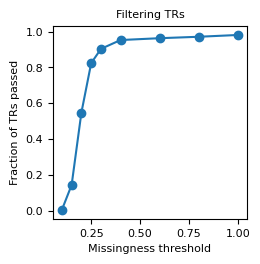

outputs//tr_ids_missingness_25.tsv
outputs//tr_ids_missingness_20.tsv
outputs//tr_ids_missingness_15.tsv


In [10]:
n_tot_trs = df_gt_flt.shape[0]
print(f'n_tot_trs: {n_tot_trs}')
missings = [1, .8, .6, .4, .3, .25, .2, .15, .1]
n_trs = []
for missing in missings:
    n_tr = df_gt_flt.loc[df_gt_flt.missingness<missing].shape[0] / n_tot_trs
    n_trs.append(n_tr)

FS = 8
plt.figure(figsize=(2.5, 2.5))
plt.plot(missings, n_trs, '-o', markersize=FS-2)
plt.title('Filtering TRs', fontsize=FS)
plt.xlabel('Missingness threshold', fontsize=FS)
plt.ylabel('Fraction of TRs passed', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/ntr_vs_missingness.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()

missing_thrs = [.25, .2, .15]
for missing_thr in missing_thrs:
    df_gt_sel = df_gt_flt.loc[df_gt_flt.missingness<missing_thr]
    file_name = f'{dir_out}/tr_ids_missingness_{int(missing_thr*100)}.tsv'
    print(file_name)
    df_gt_sel.index.to_series().to_csv(file_name, sep='\t', index=False)

In [11]:
df_gt_flt2 = df_gt[df_pca_flt.iid.tolist()].copy()
n_tot_trs = df_gt_flt2.shape[0]
print(f'n_tot_trs: {n_tot_trs}')

num_trs_gt = df_gt_flt2.apply(lambda row: len([x for x in row if x != '.']), axis=0)
print('num_trs_gt:')
display(num_trs_gt)
missingness_samples = 1. - (num_trs_gt / n_tot_trs)
print('missingness_samples:')
display(missingness_samples)

n_tot_trs: 918557
num_trs_gt:


REACH000001    895866
REACH000026     41291
REACH000058    774844
REACH000065     20827
REACH000086    653954
                ...  
REACH000756    482403
REACH000763    749700
REACH000764    547528
REACH000768     72685
REACH000769    468479
Length: 243, dtype: int64

missingness_samples:


REACH000001    0.024703
REACH000026    0.955048
REACH000058    0.156455
REACH000065    0.977326
REACH000086    0.288064
                 ...   
REACH000756    0.474825
REACH000763    0.183829
REACH000764    0.403926
REACH000768    0.920870
REACH000769    0.489984
Length: 243, dtype: float64

n_tot_samples: 243
plots/nsamples_vs_missingness.png


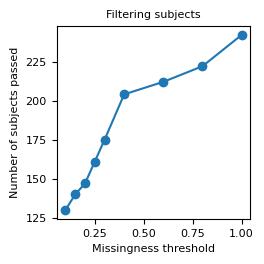

outputs//samples_missingness_30.tsv
outputs//samples_missingness_35.tsv
outputs//samples_missingness_40.tsv
outputs//samples_missingness_50.tsv


In [12]:
n_tot_samples = len(missingness_samples)
print(f'n_tot_samples: {n_tot_samples}')
missings = [1, .8, .6, .4, .3, .25, .2, .15, .1]
n_samples = []
for missing in missings:
    n_sample = len(missingness_samples.loc[missingness_samples<missing])
    n_samples.append(n_sample)

FS = 8
plt.figure(figsize=(2.5, 2.5))
plt.plot(missings, n_samples, '-o', markersize=FS-2)
plt.title('Filtering subjects', fontsize=FS)
plt.xlabel('Missingness threshold', fontsize=FS)
plt.ylabel('Number of subjects passed', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/nsamples_vs_missingness.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()

missing_thrs = [.3, .35, .4, .5]
for missing_thr in missing_thrs:
    df_sam_sel = missingness_samples.loc[missingness_samples<missing_thr]
    file_name = f'{dir_out}/samples_missingness_{int(missing_thr*100)}.tsv'
    print(file_name)
    df_sam_sel.index.to_series().to_csv(file_name, sep='\t', index=False)